# Data Analysis

Shreya D.  
July 11, 2025

# Loading Data for analysis

In [ ]:
# Setting up workspace

# For plotting trees, and although not strictly necessary, we may need the `ggtree` R package, which you should be able to install by running:
 if (!require("BiocManager", quietly = TRUE))
 install.packages("BiocManager")
 BiocManager::install("ggtree")

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

  `force = TRUE` to re-install: 'ggtree'

Old packages: 'purrr'


Loading the 'orchaRd' package (version 2.0). For an
introduction and vignette to the package please see: https://daniel1noble.github.io/orchaRd/


A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages

Warning in p_install(package, character.only = TRUE, ...):

Warning in library(package, lib.loc = lib.loc, character.only = TRUE,
logical.return = TRUE, : there is no package called 'ggpubfigs'

Warning in pacman::p_load(here, tidyverse, metafor, ggpubr, orchaRd, ggpubfigs): Failed to install/load:
ggpubfigs

Rows: 274 Columns: 71

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (35): paper_ID, fulltext_screening, variable_note, authors, population_l...
dbl (35): year_publication, Observation_ID, experiment_ID, group_ID, repeate...
lgl  (1): fulltext_notes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 259 Columns: 71
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): paper_ID, fulltext_screening, variable_note, authors, population_l...
dbl (32): year_publication, Observation_ID, experiment_ID, group_ID, repeate...
lgl  (5): fulltext_notes, test_statistics_type, sign_relationship, total_sam...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 274 Columns: 71
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (35): paper_ID, fulltext_screening, variable_note, authors, population_l...
dbl (35): year_publication, Observation_ID, experiment_ID, group_ID, repeate...
lgl  (1): fulltext_notes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

### Creating Phylogeny for the plot

In [ ]:
# # install.packages("pacman")
# # load packages
# 
# pacman::p_load(rotl,
#                ape,
#                ggtree)
# 
# 
# # We have 7 bird species in the dataset
# bird_species <- unique(dataset_analysis$bird_species)
# 
# # extracting taxonomic information
# taxa <- rotl::tnrs_match_names(names = bird_species)
# taxa
# 
# # check approximate matches
# taxa[taxa$approximate_match==TRUE & !(is.na(taxa$approximate_match)),]
# 
# # phylogenetic information for our species from the Open Tree of Life
# 
# tree <- rotl::tol_induced_subtree(ott_ids = taxa[["ott_id"]], label_format = "name")
# ape::is.binary(tree)
# 
# # here are the species included in the tree
# sort(tree$tip.label)
# 
# # removing the underscore "_" from the tree tip.label
# tree$tip.label <- gsub("_"," ", tree$tip.label)
# sort(tree$tip.label)
# 
# # compute branch lengths of tree
# phylo_branch <- compute.brlen(tree, method = "Grafen", power = 1)
# 
# # check tree is ultrametric
# is.ultrametric(phylo_branch) # TRUE
# 
# # matrix to be included in the models
# bird_phylo <- vcv(phylo_branch, cor = T)
# bird_phylo
# 
# plot(tree) #check: https://www.rdocumentation.org/packages/ape/versions/5.3/topics/plot.phylo

### Visualizing random effects structure

Using GitHub PAT from the git credential store.

Skipping install of 'ggsankey' from a github remote, the SHA1 (b675d0d5) has not changed since last install.
  Use `force = TRUE` to force installation

dropped

dropped

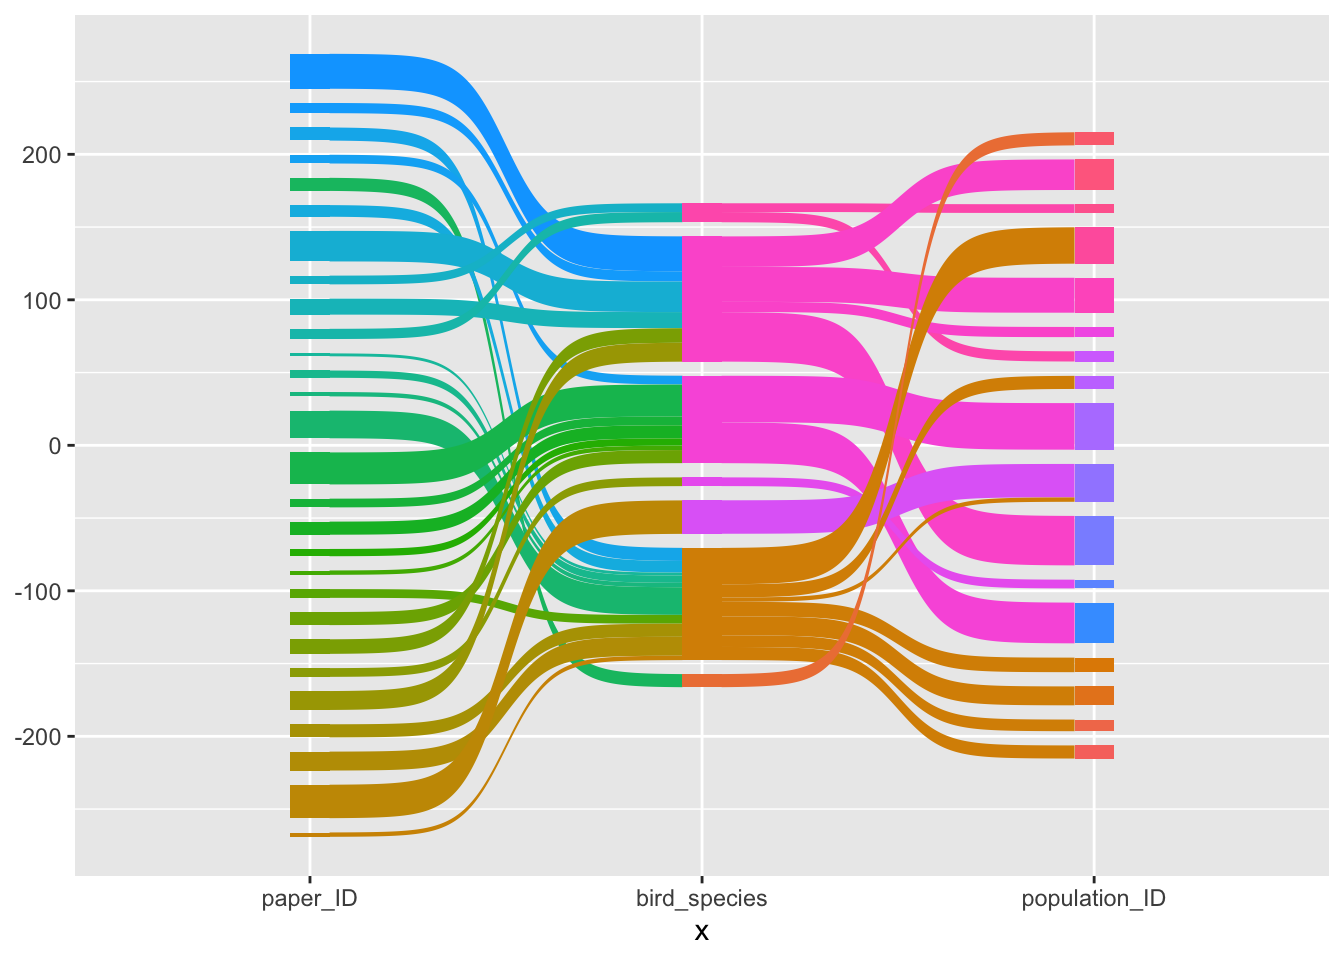

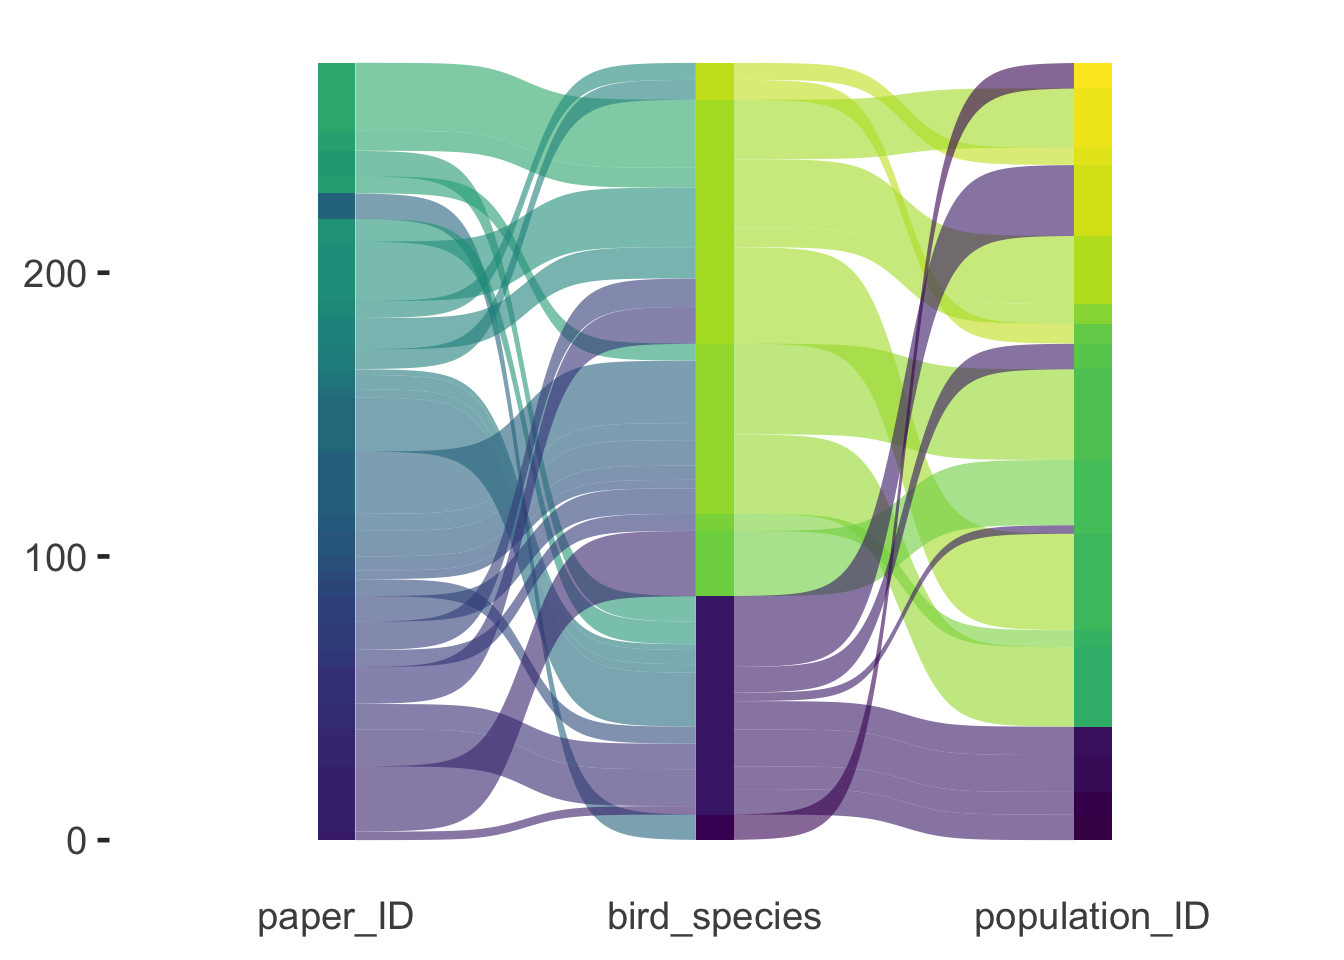

In [ ]:
# install.packages("devtools")
devtools::install_github("davidsjoberg/ggsankey")

# Preparing datasets

In [ ]:
# Let's just quickly ensure all the important variables are 
# in the correct data type

dataset_analysis<- dataset_analysis%>%mutate(across(c(paper_ID, Observation_ID, repeated_trait_ID_coded, paper_ID, experiment_ID_coded, group_ID_coded, comparision_type,Hypothesis,trait_type,parasite_type,time_of_gnm_addition, blinding, random_assignment, missing_data, population_ID,bird_species), as.factor))


dataset_lnRR<- dataset_lnRR%>%mutate(across(c(paper_ID, Observation_ID, repeated_trait_ID_coded, paper_ID, experiment_ID_coded, group_ID_coded, comparision_type,Hypothesis,trait_type,parasite_type,time_of_gnm_addition, blinding, random_assignment, missing_data, population_ID, bird_species), as.factor))

dataset_SMDH<- dataset_SMDH%>%mutate(across(c(paper_ID, Observation_ID, repeated_trait_ID_coded, paper_ID, experiment_ID_coded, group_ID_coded, comparision_type,Hypothesis,trait_type,parasite_type,time_of_gnm_addition, blinding, random_assignment, missing_data, population_ID,bird_species), as.factor))

In [ ]:
## For lnRR (or simply load dataset as provided)
dataset_lnRR<-dataset_analysis%>%
filter(lnRR_sign != "NA" | lnRR_variance != "NA")

# selecting dataset which are not flagged
dataset_lnRR<-dataset_lnRR%>%
  filter(proxy_decision == "include")

# selecting only published dataset
dataset_lnRR_published<-dataset_lnRR%>%
  filter(!is.na(year_publication))

# selecting dataset which are flagged
lnRR_con_flagged<-dataset_analysis%>%
   filter(lnRR_sign != "NA" | lnRR_variance != "NA")%>%
  filter(proxy_decision != "SMDH only" | proxy_decision != "contingency table" )

# selecting dataset without those using 0 as ES because authors reported no effect
lnRR_sin_missingES <- dataset_lnRR %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

lnRR_flagged_no_missingES<- lnRR_con_flagged %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

# selecting only dataset that passes geary's test
lnRR_geary_passed<-dataset_lnRR%>%filter(geary_test=="pass")

## For SMDH
# selecting dataset which are not flagged
dataset_SMDH<-dataset_analysis%>%
   filter(proxy_decision != "sensitivity-analysis" | is.na(proxy_decision))

# selecting only published dataset
dataset_SMDH_published<-dataset_SMDH%>%
  filter(!is.na(year_publication))

# selecting dataset which are flagged
SMDH_con_flagged<-dataset_analysis%>%
   filter(SMDH_sign != "NA")

# selecting dataset without those using 0 as ES because authors reported no effect

SMDH_sin_missingES <- dataset_SMDH %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

SMDH_flagged_no_missingES<- SMDH_con_flagged %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

# selecting dataset which are not flagged but without the SMDH calculated from inferential statistics 

SMDH_no_inferential<-dataset_analysis%>%
  filter(proxy_decision == "include")%>% filter(SMDH_sign != "NA")

# Overall effect : Intercept-only meta-analytic model

*“Does adding green material to the nest have an adaptive function across the bird species that perform this behaviour?”*

## using lnRR

In [ ]:
VCV_lnRR<- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

intercept_lnRR<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = dataset_lnRR)
# saving the model
 saveRDS(intercept_lnRR, file = here::here("model/intercept_lnRR.rds"))

# saving the dataset for this model
 write.csv(dataset_lnRR,here::here("data/04_data_analysis/intercept_lnRR.csv"))

#### Exploring heterogeneity in intercept only model

This is the function from Yefeng’s Github for interpreting heterogeneity. I have to download the data used for this function to be able to use it.

I am using the values from the table directly..

In [ ]:
# ## Function is from the Pluralistic approach to heterogeneity from Yefeng's Pre-print repository from GitHub
# 
# #-----------------------heterogeneity interpretation-----------------------#
# het_interpret <- function(observed_value, het_type, es_type, data) {
#   
#   if (!het_type %in% c("I2", "CVH", "M", "sigma2", "V_bar")) {
#     stop("Invalid heterogeneity type. Choose from 'I2', 'CVH', 'M', 'sigma2', or 'V_bar'.")
#   }
#   
#   if (!es_type %in% unique(data$es.type)) {
#     stop("Invalid effect size type. Check the levels of 'es.type'.")
#   }
#   
#   filtered_data <- data %>% filter(es.type == es_type)
#   
#   if (nrow(filtered_data) == 0) {
#     stop("No data available for the selected effect size type.")
#   }
#   
#   het_values <- filtered_data[[het_type]]
#   
#   percentiles <- quantile(het_values, probs = seq(0, 1, by = 0.05), na.rm = TRUE)
#   
#   lower_bound <- max(percentiles[percentiles <= observed_value], na.rm = TRUE)
#   upper_bound <- min(percentiles[percentiles >= observed_value], na.rm = TRUE)
#   lower_percentile <- names(percentiles)[percentiles == lower_bound]
#   upper_percentile <- names(percentiles)[percentiles == upper_bound]
#   
#   percentile_range <- paste0(lower_percentile, "-", upper_percentile, "th percentile")
#   
#   # return the results
#   return(tibble::tibble(
#     observed_value = observed_value,
#     het_type = het_type,
#     es_type = es_type,
#     percentile_range = percentile_range
#   ))
# }
# x<-het_interpret(observed_value= I2_main_model_vector[1], 
#                  het_type = "I2", 
#                  es_type = "lnRR_sign", 
#                  data= intercept_lnRR)

Let us look at the heterogeneity in lnRR intercept-only model

In [ ]:
# Then also:
# # Typical sampling variance (which captures the statistical noise of the data, 
# # but is rarely reported in the current meta-analytic practice):
sigma2_v(intercept_lnRR)

[1] 0.0003277551

[1] 0.023

## using SMDH

We are only running these analysis for the fitness proxy labelled “included”. Some proxies have been flagged and we will run them in a sensitivity analysis only

The sampling variances will be fitted as variance–covariance matrices assuming a 0.5 correlation (ρs) between sampling variances from the same paper_ID (Noble et al. 2017).

The MLMA using SMDH as the effect size measure incorporate the imputed sampling variance

In [ ]:
VCV_SMDH <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

intercept_SMDH<- rma.mv(yi = SMDH_sign, # specify SMDH as the effect size measure;
                    V = VCV_SMDH, # specify SMDH's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = dataset_SMDH)

# saving the model
 saveRDS(intercept_SMDH, file = here::here("model/intercept_SMDH.rds"))

# saving the dataset for this model
 write.csv(dataset_SMDH,here::here("data/04_data_analysis/intercept_SMDH.csv"))

## SMDH-heterogeneity

Now looking at the intercept only model

In [ ]:
summary(intercept_SMDH)


Multivariate Meta-Analysis Model (k = 253; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-324.4948   648.9896   660.9896   682.1662   661.3325   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0008     26     no        paper_ID 
sigma^2.2  0.2578  0.5077    253     no  Observation_ID 
sigma^2.3  0.0000  0.0013     47     no  group_ID_coded 
sigma^2.4  0.0000  0.0002     17     no   population_ID 
sigma^2.5  0.0000  0.0001      7     no    bird_species 

Test for Heterogeneity:
Q(df = 252) = 1114.7203, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1793  0.0665  2.6948  252  0.0075  0.0483  0.3104  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1793 0.0665 0.0483 0.3104 -0.8292 1.1879 

[1] 0.1319841

[1] 0.258

## Bivariate Meta-analytical model

For the overall effect size (i.e., the meta-analytical mean), we will run the bivariate multilevel meta-analytic model suggested by Yang et al. (2024), which models both lnRR and SMD(H) simultaneously (i.e., including them both as response variables and estimating their correlation; random).

In [ ]:
dataset_bivariate <- data.frame(paper_ID = c(dataset_lnRR$paper_ID, dataset_SMDH$paper_ID),
                      Observation_ID = c(dataset_lnRR$Observation_ID, dataset_SMDH$Observation_ID),
                      group_ID_coded = c(dataset_lnRR$group_ID_coded, dataset_SMDH$group_ID_coded),
                      population_ID = c(dataset_lnRR$population_ID, dataset_SMDH$population_ID),
                      bird_species = c(dataset_lnRR$bird_species, dataset_SMDH$bird_species),
                      ES = c(dataset_lnRR$lnRR_sign, dataset_SMDH$SMDH_sign),
                      V_ES = c(dataset_lnRR$lnRR_variance, dataset_SMDH$SMDH_variance),
                      ES_measure = c(rep("lnRR", nrow(dataset_lnRR)), rep("SMDH", nrow(dataset_SMDH)))
                      )

VCV_bivariate <- vcalc(vi = V_ES, # sampling variances of lnRR and SMD that are correlated within the same study;
             cluster = paper_ID, # study identity;
             type = ES_measure, # different types of effect size measures underlying the observed effect sizes;
             data = dataset_bivariate, # the long format data frame;
             rho = 0.2, # assuming that the effect sizes within the same study are correlated with rho = 0.5.
             nearpd = TRUE # specify whether impose the non positive definite VCV matrix (not invertible) to the nearest positive semi-definite matrix 
             )

Bivariate_model <- rma.mv(yi = ES, # specify the effect size estimate (the variable ES in our case);
                V = VCV_bivariate, # specify the imputed variance-covariance matrix;
                mods = ~ ES_measure - 1, # specify the variable "ES_measure" indicating the types of effect size measures;
                random = list(~ ES_measure | paper_ID, 
                              ~ ES_measure | Observation_ID,
                              ~ 1 | group_ID_coded,
                              ~ 1 | population_ID,
                              ~ 1 | bird_species
                              ), # add correlated random effects corresponding to the lnRR and SMD parameters in the same study;
                struct = "UN", # impose an unstructured variance-covariance of the study-specific random effects;
                test = "t", # t distribution is specified to test the overall effect against the null hypothesis and construct confidence intervals;
                method = "REML", # restricted likelihood maximum is assigned as the estimator for variance components as suggested;
                data = dataset_bivariate, # the long format dataset
                sparse = T
               )

# Saving the model
saveRDS(Bivariate_model, file = here::here("model/sensitivity_analysis/bivariate_model.rds"))
# saving the dataset for this model
write.csv(dataset_bivariate,here::here("data/05_data_sensitivity_analysis/dataset_bivariate.csv"))

summary(Bivariate_model)


Multivariate Meta-Analysis Model (k = 491; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-480.9777   961.9555   983.9555  1030.0715   984.5089   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0000     47     no  group_ID_coded 
sigma^2.2  0.0000  0.0000     17     no   population_ID 
sigma^2.3  0.0000  0.0000      7     no    bird_species 

outer factor: paper_ID   (nlvls = 26)
inner factor: ES_measure (nlvls = 2)

            estim    sqrt  k.lvl  fixed  level 
tau^2.1    0.0013  0.0360     26     no   lnRR 
tau^2.2    0.1525  0.3906     26     no   SMDH 

      rho.lnRR  rho.SMDH    lnRR  SMDH 
lnRR         1                 -    26 
SMDH   -1.0000         1      no     - 

outer factor: Observation_ID (nlvls = 253)
inner factor: ES_measure     (nlvls = 2)

              estim    sqrt  k.lvl  fixed  level 
gamma^2.1    0.1291  0.3593    238     no   lnRR 
gamma^2.2    1.2735  1.1285    253     no   SMDH

Warning in geom_point(aes(x = coef(Bivariate_model)[1], y = coef(Bivariate_model)[2]), : All aesthetics have length 1, but the data has 253 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.

(`geom_point()`).

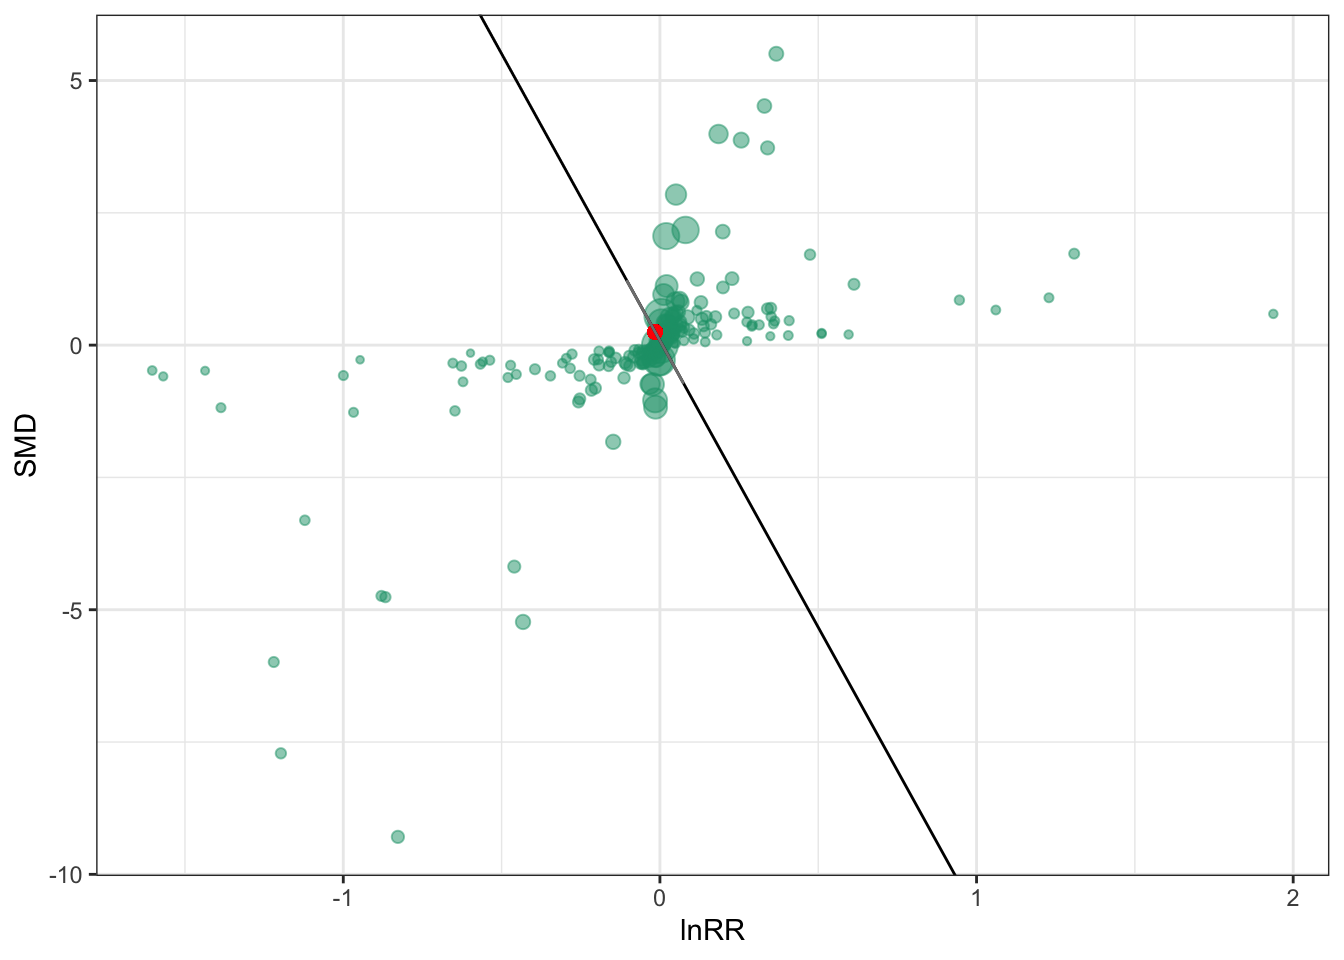

In [ ]:
pacman::p_load(ellipse)
ab.l <- matreg(y=2, x=1, R=Bivariate_model$G, cov=TRUE, means=coef(Bivariate_model), n=Bivariate_model$g.levels.comb.k) # fit regression model

xy <- ellipse(Bivariate_model$G, centre=coef(Bivariate_model), level=0.95) # get 95% coverage region
ellipse_df <- data.frame(x = xy[, 1], y = xy[, 2]) # convert it int dataframe so that we can use ggplot to make a figure

pivot_wider(dataset_bivariate, names_from = ES_measure, values_from = c(ES, V_ES)) %>%
  ggplot() + 
  geom_point(aes(x = ES_lnRR, y = ES_SMDH, size = 1/sqrt(V_ES_lnRR)), color = "#1B9E77", alpha = 0.5) + 
  geom_point(aes(x = coef(Bivariate_model)[1], y = coef(Bivariate_model)[2]), color = "red", size = 2) + 
  geom_abline(intercept = ab.l$tab$beta[1], slope = ab.l$tab$beta[2]) +
  geom_path(data = ellipse_df, aes(x = x, y = y), color = "gray50") +
  #scale_x_continuous(limits = c(-2.5, 2.5)) + 
  #scale_y_continuous(limits = c(-2.5, 2.5)) + 
  guides(size = "none") + 
  labs(x = "lnRR", y = "SMD") + 
  theme_bw()

There is a very high negative correlation between the two effect sizes. This probably is an artifact of the data and not a true correlation. If you look at the model summary, the $tau^2$ for lnRR, it is extremely small 0.0008, i.e., there is very little variance. This could also be stemming from the fact that the log values in the dataset could be causing this. For SMDH on the other hand, the $tau^2$ is 0.1681 that is much larger. This difference in the variance estimate itself could be causing this artifact of the model. I will only go ahead to present this model as a senstivity analysis because I am not completely convinced by it’s robustness.

# Sensitivity Analysis

### With published data only

In [ ]:
#----------------------------------------------------------------------------
# for lnRR as Effect Size
#----------------------------------------------------------------------------

# Preparing new variance-covariance matrix

VCV_lnRR_published <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_published,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_published<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_published, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = dataset_lnRR_published)


# Saving the model
saveRDS(SA_lnRR_published, file = here::here("model/sensitivity_analysis/SA_lnRR_published.rds"))
# saving the dataset for this model
write.csv(dataset_lnRR_published,here::here("data/05_data_sensitivity_analysis/dataset_lnRR_published.csv"))


# What is the effect now?

summary(SA_lnRR_published)


Multivariate Meta-Analysis Model (k = 221; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-22.5653   45.1306   57.1306   77.4923   57.5249   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0003     24     no        paper_ID 
sigma^2.2  0.0244  0.1563    221     no  Observation_ID 
sigma^2.3  0.0000  0.0001     44     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     15     no   population_ID 
sigma^2.5  0.0000  0.0000      6     no    bird_species 

Test for Heterogeneity:
Q(df = 220) = 2253.0536, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0197  0.0164  1.2034  220  0.2301  -0.0126  0.0519    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0197 0.0164 -0.0126 0.0519 -0.2900 0.3293 


Multivariate Meta-Analysis Model (k = 235; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-308.4661   616.9322   628.9322   649.6641   629.3022   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0010     24     no        paper_ID 
sigma^2.2  0.2740  0.5235    235     no  Observation_ID 
sigma^2.3  0.0000  0.0015     45     no  group_ID_coded 
sigma^2.4  0.0000  0.0002     15     no   population_ID 
sigma^2.5  0.0000  0.0001      6     no    bird_species 

Test for Heterogeneity:
Q(df = 234) = 1092.0602, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1916  0.0688  2.7849  234  0.0058  0.0561  0.3271  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1916 0.0688 0.0561 0.3271 -0.8486 1.2318 

### With flagged proxies

Some traits for which the relationship with fitness is unclear or highly debated in the literature

In [ ]:
#----------------------------------------------------------------------------
# for lnRR as Effect Size
#----------------------------------------------------------------------------

# Preparing new variance-covariance matrix

VCV_lnRR_flagged <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_con_flagged,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_flagged<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_flagged, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_con_flagged)



# Saving the model
saveRDS(SA_lnRR_flagged, file = here::here("model/sensitivity_analysis/SA_lnRR_flagged.rds"))
# saving the dataset for this model
write.csv(lnRR_con_flagged,here::here("data/05_data_sensitivity_analysis/dataset_lnRR_con_flagged.csv"))

# What is the effect now?

summary(SA_lnRR_flagged)


Multivariate Meta-Analysis Model (k = 259; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-25.1782   50.3564   62.3564   83.6742   62.6911   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0001     28     no        paper_ID 
sigma^2.2  0.0223  0.1494    259     no  Observation_ID 
sigma^2.3  0.0000  0.0004     52     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     17     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 258) = 2395.1696, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0237  0.0149  1.5886  258  0.1134  -0.0057  0.0531    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0237 0.0149 -0.0057 0.0531 -0.2720 0.3194 


Multivariate Meta-Analysis Model (k = 274; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-344.0150   688.0299   700.0299   721.6868   700.3457   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0014     28     no        paper_ID 
sigma^2.2  0.2487  0.4987    274     no  Observation_ID 
sigma^2.3  0.0000  0.0022     53     no  group_ID_coded 
sigma^2.4  0.0000  0.0001     17     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 273) = 1184.8136, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1911  0.0631  3.0269  273  0.0027  0.0668  0.3154  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1911 0.0631 0.0668 0.3154 -0.7985 1.1807 

### Without 0 ES

In [ ]:
#----------------------------------------------------------------------------
# for lnRR as Effect Size
#----------------------------------------------------------------------------

# Preparing new variance-covariance matrix

VCV_lnRR_no_missingES <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_sin_missingES,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_no_missingES<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_no_missingES, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_sin_missingES)



# Saving the model
saveRDS(SA_lnRR_no_missingES, file = here::here("model/sensitivity_analysis/SA_lnRR_no_missingES.rds"))
# saving the dataset for this model
write.csv(lnRR_sin_missingES,here::here("data/05_data_sensitivity_analysis/dataset_lnRR_sin_missingES.csv"))


# What is the effect now?

summary(SA_lnRR_no_missingES)


Multivariate Meta-Analysis Model (k = 222; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-29.9487   59.8973   71.8973   92.2863   72.2899   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0002     26     no        paper_ID 
sigma^2.2  0.0244  0.1563    222     no  Observation_ID 
sigma^2.3  0.0000  0.0002     46     no  group_ID_coded 
sigma^2.4  0.0000  0.0001     17     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 221) = 2275.2780, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0189  0.0160  1.1828  221  0.2381  -0.0126  0.0505    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0189 0.0160 -0.0126 0.0505 -0.2906 0.3285 


Multivariate Meta-Analysis Model (k = 237; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-315.4239   630.8479   642.8479   663.6309   643.2147   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0008     26     no        paper_ID 
sigma^2.2  0.2967  0.5447    237     no  Observation_ID 
sigma^2.3  0.0000  0.0013     47     no  group_ID_coded 
sigma^2.4  0.0000  0.0002     17     no   population_ID 
sigma^2.5  0.0000  0.0001      7     no    bird_species 

Test for Heterogeneity:
Q(df = 236) = 1113.5021, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1860  0.0701  2.6545  236  0.0085  0.0480  0.3240  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1860 0.0701 0.0480 0.3240 -0.8960 1.2680 

### With flagged proxies and no missing ES

In [ ]:
#----------------------------------------------------------------------------
# for lnRR as Effect Size
#----------------------------------------------------------------------------

# Preparing new variance-covariance matrix

VCV_flagged_no_missingES <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_flagged_no_missingES,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_flagged_no_missingES<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_flagged_no_missingES, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_flagged_no_missingES)



# Saving the model
saveRDS(SA_lnRR_flagged_no_missingES, file = here::here("model/sensitivity_analysis/SA_lnRR_flagged_no_missingES.rds"))

# saving the dataset for this model
write.csv(lnRR_flagged_no_missingES,here::here("data/05_data_sensitivity_analysis/dataset_lnRR_flagged_no_missingES.csv"))

# What is the effect now?

summary(SA_lnRR_flagged_no_missingES)


Multivariate Meta-Analysis Model (k = 243; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-29.1661   58.3322   70.3322   91.2658   70.6897   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0001     28     no        paper_ID 
sigma^2.2  0.0236  0.1537    243     no  Observation_ID 
sigma^2.3  0.0000  0.0003     52     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     17     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 242) = 2392.7303, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0238  0.0153  1.5581  242  0.1205  -0.0063  0.0540    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0238 0.0153 -0.0063 0.0540 -0.2804 0.3281 


Multivariate Meta-Analysis Model (k = 258; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-335.1461   670.2922   682.2922   703.5867   682.6282   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0004     28     no        paper_ID 
sigma^2.2  0.2812  0.5303    258     no  Observation_ID 
sigma^2.3  0.0001  0.0097     53     no  group_ID_coded 
sigma^2.4  0.0000  0.0001     17     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 257) = 1183.6500, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1988  0.0661  3.0075  257  0.0029  0.0686  0.3289  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1988 0.0661 0.0686 0.3289 -0.8538 1.2514 

### No inferential stats for SMDH: effect sizes calculated from means, SDs, and sample size

(i.e., excluding any effect sizes calculated from inferential statistics)

In [ ]:
#----------------------------------------------------------------------------
# for SMDH as Effect Size
#----------------------------------------------------------------------------

# Preparing new variance-covariance matrix

VCV_SMDH_no_inferential <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = SMDH_no_inferential,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_SMDH_no_inferential<- rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_no_inferential, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = SMDH_no_inferential)



# Saving the model
saveRDS(SA_SMDH_no_inferential, file = here::here("model/sensitivity_analysis/SA_SMDH_no_inferential.rds"))

# saving the dataset for this model
write.csv(SMDH_no_inferential,here::here("data/05_data_sensitivity_analysis/dataset_SMDH_no_inferential.csv"))

# What is the effect now?

summary(SA_SMDH_no_inferential)


Multivariate Meta-Analysis Model (k = 245; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-319.1347   638.2694   650.2694   671.2524   650.6238   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0005     26     no        paper_ID 
sigma^2.2  0.2716  0.5212    245     no  Observation_ID 
sigma^2.3  0.0000  0.0018     46     no  group_ID_coded 
sigma^2.4  0.0000  0.0001     17     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 244) = 1105.9021, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1794  0.0685  2.6193  244  0.0094  0.0445  0.3143  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1794 0.0685 0.0445 0.3143 -0.8560 1.2148 

### Exluding failed geary’s test for lnRR

In [ ]:
#----------------------------------------------------------------------------
# for  lnRR  as Effect Size
#----------------------------------------------------------------------------

VCV_lnRR_geary_passed <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_geary_passed,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


SA_lnRR_geary_passed<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_geary_passed, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_geary_passed)

# Saving the model
saveRDS(SA_lnRR_geary_passed, file = here::here("model/sensitivity_analysis/SA_lnRR_geary_passed.rds"))

# saving the dataset for this model
write.csv(lnRR_geary_passed,here::here("data/05_data_sensitivity_analysis/dataset_lnRR_geary_passed.csv"))

### Excluding the parasite and pathogen load fitness proxies

It excludes all the fitness proxies relating to parasite and pathogen loads/ abundance etc.

In [ ]:
#----------------------------------------------------------------------------
# for  lnRR  as Effect Size
#----------------------------------------------------------------------------

dataset_lnRR_no_para<-dataset_lnRR%>%filter(is.na(parasite_type))

## The dataset is reduced to almost half
nrow(dataset_lnRR)-nrow(dataset_lnRR_no_para)

[1] 82

[1] 86

## Different values of sampling variance correlation

> **Important**
>
> **Pre-registered**: We will also perform a sensitivity analysis using 0.3 and 0.7 correlation between the sampling variances from the same paper_ID and report it in the supplementary materials. If this sensitivity analysis shows large differences in conclusions for the intercept-only model, we will proceed to perform such sensitivity analysis for the meta-regressions.

First, set a series of ρs (i.e., 0.3, 0.5, 0.7) (we assume these values arbitrarily):

In [ ]:
# rho_range <- c(0.2,0.3, 0.5, 0.7,0.8)
# 
# SA_lnRR_VCV_range <- list() # repeatedly run the specified model with varying rho
# for (i in 1:length(rho_range)){
#   VCV_range <- vcalc(vi = lnRR_variance,
#                      cluster = paper_ID,
#                      obs = Observation_ID,
#                      data = dataset_lnRR,
#                      rho = rho_range[i])
# 
#   lnRR_VCV_range[[i]] <- rma.mv(yi = lnRR_sign,
#                                 V = VCV_range,
#                                 random = list(~ 1 | paper_ID,
#                                               ~ 1 | Observation_ID,
#                                               ~ 1 | group_ID_coded,
#                                               ~ 1 | population_ID,
#                                               ~ 1 | bird_species),
#                                 method = "REML",
#                                 data = dataset_lnRR)
# }
# 
# 
# save(SA_lnRR_VCV_range, file = here::here("model/sensitivity_analysis/SA_lnRR_VCV_range.rds"))
# 
# 
# #------------------------------------------------------------------
# #-------------Now for SMDH the same SA with diff Rho---------------
# #------------------------------------------------------------------
# 
# SA_SMDH_VCV_range <- list()
# 
# for (i in 1:length(rho_range)){
#   VCV_range <- vcalc(vi = SMDH_variance,
#                      cluster = paper_ID,
#                      obs = Observation_ID,
#                      data = dataset_SMDH,
#                      rho = rho_range[i])
#   SA_SMDH_VCV_range[[i]] <- rma.mv(yi = SMDH_sign,
#                                 V = VCV_range,
#                                 random = list(~ 1 | paper_ID,
#                                               ~ 1 | Observation_ID,
#                                               ~ 1 | group_ID_coded,
#                                               ~ 1 | population_ID,
#                                               ~ 1 | bird_species),
#                                 method = "REML",
#                                 data = dataset_SMDH)
# }
# 
# 
# save(SA_SMDH_VCV_range, file = here::here("model/sensitivity_analysis/SA_SMDH_VCV_range.rds"))

# Mechanistic Hypothesis

To address our secondary questions “Does the addition of green nest material by birds increase their reproductive success? (Courtship hypothesis)” and “Does the addition of green nest material have protective effects and health benefits for the nestlings? (Parental care hypothesis)”, we will make use of the unimoderator multilevel meta-regressions hypothesis type (levels: CH, PCH, Both) as the moderator.

In [ ]:
lnRR_hypothesis <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ - 1 + Hypothesis,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)
# Save model
saveRDS(lnRR_hypothesis, file = here::here("model/lnRR_hypothesis.rds"))

# saving the dataset for this model
write.csv(dataset_lnRR,here::here("data/04_data_analysis/hypothesis_lnRR.csv"))


lnRR_hypothesis_R2 <- r2_ml(lnRR_hypothesis)
round(lnRR_hypothesis_R2 * 100, 1)

   R2_marginal R2_conditional 
           1.6            1.6 

# Meta-regressions

For understanding the heterogeneity in our intercept-only model, we will run unimoderator multilevel meta-regressions (see section Exploratory Analyses in pre-registration or manuscript) using the following moderators:

## Type of experimental design

(levels: 1 = non-aromatic vs. aromatic, 2 = no added material vs. aromatic, 3 = no added material vs. non-aromatic).

In [ ]:
# This analysis only includes dataset that has a proxy relating to comaparision type
dataset_lnRR_design <- dataset_lnRR %>% filter(!is.na(comparision_type))

VCV_lnRR_design <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_design,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )
lnRR_design <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_design ,# specify lnRR's sampling variance;
                    mods = ~ - 1 + comparision_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_design )

# Saving the model
saveRDS(lnRR_design, file = here::here("model/lnRR_design.rds"))

# saving the dataset for this model
write.csv(dataset_lnRR_design,here::here("data/04_data_analysis/design_lnRR.csv"))


# This analysis only includes dataset that has a proxy relating to comaparision type
dataset_SMDH_design <- dataset_SMDH %>% filter(!is.na(comparision_type))

VCV_SMDH_design <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH_design,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )
SMDH_design <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_design ,# specify lnRR's sampling variance;
                    mods = ~ - 1 + comparision_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH_design )

# Saving the model
saveRDS(SMDH_design, file = here::here("model/SMDH_design.rds"))

# saving the dataset for this model
write.csv(dataset_SMDH_design,here::here("data/04_data_analysis/design_SMDH.csv"))

Let me try to do a sensitivity analysis to see what happens when I remove the control condition of 3 in the overall model since that is expected to not have an effect according to the authors as well.. i.e. it is a double control..

### Excluding non-aromatic and blank comparison (i.e. the two control group comparison)

In [ ]:
## For the lnRR effect size...
dataset_lnRR_no_comp3<-dataset_lnRR%>%filter(comparision_type!=3 | is.na(comparision_type))
## Only some rows are removed... 
nrow(dataset_lnRR)-nrow(dataset_lnRR_no_comp3)

[1] 10

[1] 11

Overall conclusions remain practically the same irrespective.. now what about the meta-regression using Type of Experiment Design

In [ ]:
dataset_lnRR_design_SA <- dataset_lnRR %>% filter(comparision_type!=3)

VCV_lnRR_design_SA <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_design_SA,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )
lnRR_design_SA <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_design_SA ,# specify lnRR's sampling variance;
                    mods = ~ - 1 + comparision_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_design_SA )

## Time of addition of green nest material

(levels: before egg hatching, after egg hatching, continuously throughout the nesting phase).

In [ ]:
## We use the complete dataset in this case
lnRR_time_gnm_addition <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance using the variance-covariance matrix we created for the intercept-only model since the whole dataset is being used in this case as well
                    mods = ~ - 1 + time_of_gnm_addition,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

## Saving the model
saveRDS(lnRR_time_gnm_addition, file = here::here("model/lnRR_time_gnm_addition.rds"))

# saving the dataset for this model
write.csv(dataset_lnRR,here::here("data/04_data_analysis/time_gnm_lnRR.csv"))



## Now similarly for the SMDH effect size using the complete dataset
SMDH_time_gnm_addition <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH,# specify lnRR's sampling variance using the variance-covariance matrix we created for the intercept-only model since the whole dataset is being used in this case as well
                    mods = ~ - 1 + time_of_gnm_addition,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

## Saving the model
saveRDS(SMDH_time_gnm_addition, file = here::here("model/SMDH_time_gnm_addition.rds"))

# saving the dataset for this model
write.csv(dataset_SMDH,here::here("data/04_data_analysis/time_gnm_SMDH.csv"))

## Type of parasites

(levels: arthropods, micro-organisms)

In [ ]:
# This analysis only includes dataset that has a proxy relating to parasite or pathogen
dataset_lnRR_parasite <- dataset_lnRR%>%
  filter(!is.na(parasite_type))%>%
  mutate(parasite_type=as.factor(parasite_type),
         paper_ID=as.factor(paper_ID),
         Observation_ID=as.factor(Observation_ID),
         group_ID_coded=as.factor(group_ID_coded),
         bird_species=as.factor(bird_species))

VCV_lnRR_parasite <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_parasite,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

lnRR_parasite <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_parasite,# specify lnRR's sampling variance;
                    mods = ~ - 1 + parasite_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                   test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_parasite)


# Saving the model
saveRDS(lnRR_parasite, file = here::here("model/lnRR_parasite.rds"))

# saving the dataset for this model
write.csv(dataset_lnRR_parasite,here::here("data/04_data_analysis/parasite_lnRR.csv"))

### Similiarly for SMDH as well selecting the dataset with parasite type
# This analysis only includes dataset that has a proxy relating to parasite or pathogen
dataset_SMDH_parasite <- dataset_SMDH%>%
  filter(!is.na(parasite_type))
VCV_SMDH_parasite <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH_parasite,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

SMDH_parasite <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_parasite,# specify lnRR's sampling variance;
                    mods = ~ - 1 + parasite_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                   test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH_parasite)

# Save the model
saveRDS(SMDH_parasite, file = here::here("model/SMDH_parasite.rds"))

# saving the dataset for this model
write.csv(dataset_SMDH_parasite,here::here("data/04_data_analysis/parasite_SMDH.csv"))

#### Bird species

(levels: Cyanistes caeruleus, Sturnus unicolor, Tachycineta bicolor, Sturnus vulgaris; note that these levels reflect the list of species studied in our current database, which may increase after updating our search and/or receiving unpublished data from authors)

In [ ]:
lnRR_birds <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ - 1 + bird_species,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

# Saving the model
saveRDS(lnRR_birds, file = here::here("model/lnRR_birds.rds"))

# Saving the dataset for this model
write.csv(dataset_lnRR,here::here("data/04_data_analysis/birds_lnRR.csv"))

## Now doing this for SMDH

SMDH_birds <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH,# specify lnRR's sampling variance;
                    mods = ~ - 1 + bird_species,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

# Saving the model
saveRDS(SMDH_birds, file = here::here("model/SMDH_birds.rds"))

# Saving the dataset for this model
write.csv(dataset_SMDH,here::here("data/04_data_analysis/birds_SMDH.csv"))

#### Type of trait studied

(levels:physiology, morphology, reproduction, behaviour, parasite and pathogenic load, phenology)

In [ ]:
lnRR_trait <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ - 1 + trait_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

# Saving the model
saveRDS(lnRR_trait, file = here::here("model/lnRR_trait.rds"))

# Saving the dataset for this model
write.csv(dataset_lnRR,here::here("data/04_data_analysis/trait_lnRR.csv"))

## Now similarly for SMDH

SMDH_trait <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH,# specify lnRR's sampling variance;
                    mods = ~ - 1 + trait_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

# Saving the model
saveRDS(SMDH_trait, file = here::here("model/SMDH_trait.rds"))

# Saving the dataset for this model
write.csv(dataset_SMDH,here::here("data/04_data_analysis/SMDH_lnRR.csv"))

# Risk of Bias

6\. Blinding: (Levels: yes, no(

7\. Random Assignment: (Levels: yes, no)

8\. Missing Data: (Levels: yes, no)

Note that the specific subset of data for each meta-regression may differ based on the data availability (e.g., information about the type of parasites is only available for effect sizes based on parasite/pathogen related fitness proxy). We will conduct meta-regression on suitable subsets of data for each analysis, provided we have sufficient effect sizes per moderator level (i.e., at least 5 effect sizes per moderator level).

> **Phylogenetic Effects**
>
> Note also that if we obtain additional effect sizes for other bird species after we update our search and/or contact authors, our models may need to account for phylogenetic nonindependence via the inclusion of two additional random effects: “species” and “phylogeny” following Cinar et al. (2022).

## Other Analysis

### Risk of Bias Assessment

-   RoB - The outcome will be presented in the form of a <u>**summary table**</u>. We will conduct uni-moderator meta-regressions using these variables.

# Publication Bias

Small study effects:

In [ ]:
dataset_lnRR_published<-dataset_lnRR_published%>%
  mutate(effective_n_inv=1/((4*effective_n_experiment*effective_n_control)/(effective_n_experiment+effective_n_control)))%>%
  mutate(sqrt_effective_n_inv=sqrt(effective_n_inv))


lnRR_small_study <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_published,# specify lnRR's sampling variance;
                    mods = ~sqrt_effective_n_inv,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_published)


# saving the model
saveRDS(lnRR_small_study, file = here::here("model/lnRR_small_study.rds"))

summary(lnRR_small_study)


Multivariate Meta-Analysis Model (k = 221; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-22.8747   45.7494   59.7494   83.4729   60.2802   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0003     24     no        paper_ID 
sigma^2.2  0.0244  0.1561    221     no  Observation_ID 
sigma^2.3  0.0000  0.0002     44     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     15     no   population_ID 
sigma^2.5  0.0000  0.0000      6     no    bird_species 

Test for Residual Heterogeneity:
QE(df = 219) = 2233.6944, p-val < .0001

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 219) = 0.2828, p-val = 0.5954

Model Results:

                      estimate      se    tval   df    pval    ci.lb   ci.ub    
intrcpt                 0.0033  0.0349  0.0934  219  0.9257  -0.0656  0.0721    
sqrt_effective_n_inv    0.0793  0.1491  0.5318  219  0.5954  -0.2145  0.3731    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 

   R2_marginal R2_conditional 
          0.34           0.34 


Multivariate Meta-Analysis Model (k = 235; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-305.6554   611.3107   625.3107   649.4680   625.8085   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0009     24     no        paper_ID 
sigma^2.2  0.2721  0.5216    235     no  Observation_ID 
sigma^2.3  0.0000  0.0004     45     no  group_ID_coded 
sigma^2.4  0.0000  0.0002     15     no   population_ID 
sigma^2.5  0.0000  0.0001      6     no    bird_species 

Test for Residual Heterogeneity:
QE(df = 233) = 1089.6262, p-val < .0001

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 233) = 3.1936, p-val = 0.0752

Model Results:

                      estimate      se     tval   df    pval    ci.lb   ci.ub 
intrcpt                -0.0348  0.1441  -0.2417  233  0.8092  -0.3187  0.2491 
sqrt_effective_n_inv    1.3931  0.7795   1.7871  233  0.0752  -0.1428  2.9289 
                        
intrcpt                 


   R2_marginal R2_conditional 
          8.31           8.31 

Decline effects (Time lag bias)

Next, run a uni-moderator meta-regression to test for evidence of decline effects (also known as time-lag bias) which includes year of publication (mean-centered) as the only moderator, and whose slope would provide information about whether the overall effect size has changed (decline) over time (Nakagawa et al. 2022; Sánchez-Tójar et al. 2018).

In [ ]:
dataset_lnRR_published<-dataset_lnRR_published%>%
  mutate(year_MeanCenter=scale(as.numeric(year_publication),scale=F)[,1])

lnRR_decline_eff <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_published,# specify lnRR's sampling variance;
                    mods = ~ year_MeanCenter,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_published)

# saving the model
saveRDS(lnRR_decline_eff, file = here::here("model/lnRR_decline_eff.rds"))
  
summary(lnRR_decline_eff)


Multivariate Meta-Analysis Model (k = 221; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-22.3187   44.6375   58.6375   82.3610   59.1683   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0003     24     no        paper_ID 
sigma^2.2  0.0235  0.1533    221     no  Observation_ID 
sigma^2.3  0.0000  0.0001     44     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     15     no   population_ID 
sigma^2.5  0.0000  0.0000      6     no    bird_species 

Test for Residual Heterogeneity:
QE(df = 219) = 1985.1165, p-val < .0001

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 219) = 1.4831, p-val = 0.2246

Model Results:

                 estimate      se     tval   df    pval    ci.lb   ci.ub    
intrcpt            0.0209  0.0161   1.2979  219  0.1957  -0.0109  0.0527    
year_MeanCenter   -0.0018  0.0015  -1.2178  219  0.2246  -0.0048  0.0011    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

   R2_marginal R2_conditional 
          1.76           1.76 


Multivariate Meta-Analysis Model (k = 235; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-306.7002   613.4005   627.4005   651.5577   627.8982   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0013     24     no        paper_ID 
sigma^2.2  0.2768  0.5261    235     no  Observation_ID 
sigma^2.3  0.0000  0.0029     45     no  group_ID_coded 
sigma^2.4  0.0000  0.0003     15     no   population_ID 
sigma^2.5  0.0000  0.0000      6     no    bird_species 

Test for Residual Heterogeneity:
QE(df = 233) = 1091.5803, p-val < .0001

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 233) = 1.2515, p-val = 0.2644

Model Results:

                 estimate      se     tval   df    pval    ci.lb   ci.ub     
intrcpt            0.1935  0.0690   2.8051  233  0.0055   0.0576  0.3293  ** 
year_MeanCenter   -0.0083  0.0074  -1.1187  233  0.2644  -0.0228  0.0063     

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05

   R2_marginal R2_conditional 
          2.93           2.93 

Last, run an all-in meta-regression including both the (square root of the) inverse of the ‘effective sample size’ and the mean-centered year of publication as well as all the other moderators tested in our study to estimate how much heterogeneity is explained by all moderators combined as well as to explore whether evidence remains similar after accounting for all the other moderators (see equation 29 in Nakagawa et al. 2022 for more information about this approach). 

## All-in Model for heterogeneity

In [ ]:
# ## For lnRR complete dataset
# 
# ## I am changing the year of unpublished studies to 2025 which is to now, assuming that if they were to be published now, what would be the effect. I will keep in mind that in this model if I do find an evidence of publication bias over years, I should keep in mind it is non-independent of the unpublished studies
# 
# dataset_lnRR_all_in<-dataset_lnRR%>%mutate(year_publication = case_when(is.na(year_publication) ~ 2025, TRUE ~ year_publication))%>%
#   mutate(year_MeanCenter=scale(as.numeric(year_publication),scale=F)[,1])%>%
#   mutate(effective_n_inv=1/((4*effective_n_experiment*effective_n_control)/(effective_n_experiment+effective_n_control)))%>%
#   mutate(sqrt_effective_n_inv=sqrt(effective_n_inv))%>%
#   mutate(comparision_type= case_when(is.na(comparision_type) ~ 4, TRUE ~ comparision_type))
# 
# VCV_lnRR_all_in<- vcalc(vi = lnRR_variance,
#                   cluster = paper_ID,
#                   obs = Observation_ID,
#                   data = dataset_lnRR_all_in,
#                   rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
#                   )
# 
# lnRR_all_in <- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
#                     V = VCV_lnRR_all_in, # specify lnRR's sampling variance-covariance matrix;
#                     mods = ~ time_of_gnm_addition + 
#                       year_MeanCenter + 
#                       sqrt_effective_n_inv + 
#                       as.factor(comparision_type) + 
#                       bird_species + 
#                       trait_type,
#                     random = list(~ 1 | paper_ID,
#                                   ~ 1 | Observation_ID,
#                                   ~ 1 | group_ID_coded,
#                                   ~ 1 | population_ID,
#                                   ~ 1 | bird_species),
#                     method = "REML",
#                     control = list(optimizer="optim"),
#                     test = "t",
#                     data = dataset_lnRR_all_in)
# 
# 
# 
# ## For SMDH complete published dataset
# 
# dataset_SMDH_all_in<-dataset_SMDH%>%mutate(year_publication = case_when(is.na(year_publication) ~ 2025, TRUE ~ year_publication))%>%
#   mutate(year_MeanCenter=scale(as.numeric(year_publication),scale=F)[,1])%>%
#   mutate(effective_n_inv=1/((4*effective_n_experiment*effective_n_control)/(effective_n_experiment+effective_n_control)))%>%
#   mutate(sqrt_effective_n_inv=sqrt(effective_n_inv))%>%
#   mutate(comparision_type= case_when(is.na(comparision_type) ~ 4, TRUE ~ comparision_type))
# 
# VCV_SMDH_all_in<- vcalc(vi = SMDH_variance,
#                   cluster = paper_ID,
#                   obs = Observation_ID,
#                   data = dataset_SMDH_all_in,
#                   rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
#                   )
# 
# SMDH_all_in<- rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
#                     V = VCV_SMDH_all_in, # specify lnRR's sampling variance-covariance matrix;
#                     mods = ~ time_of_gnm_addition + 
#                       year_MeanCenter + 
#                       sqrt_effective_n_inv + 
#                       as.factor(comparision_type) + 
#                       bird_species + 
#                       trait_type,
#                     random = list(~ 1 | paper_ID,
#                                   ~ 1 | Observation_ID,
#                                   ~ 1 | group_ID_coded,
#                                   ~ 1 | population_ID,
#                                   ~ 1 | bird_species),
#                     method = "REML",
#                     control = list(optimizer="optim"),
#                     test = "t",
#                     data = dataset_SMDH_all_in)

# Pair-wise comparison for meta-regression

including including post-hoc Wald tests

For this I have to run all the meta-regressions again without removing the intercepts, good luck to me!

In [ ]:
#----------------------------------------------------------------------------------
# For Different hypothesis
#----------------------------------------------------------------------------------
## For lnRR
VCV_lnRR<- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

lnRR_hypothesis_pc <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ Hypothesis,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

# I now want to test for statistical differences between groups. Male and fem
# information for androgens can be obtained from the outcome of the table. For thyroid
# hormones I need to do Post-hoc Wald tests:
car::linearHypothesis(lnRR_hypothesis_pc, rbind(c(0,1,-1)))


Linear hypothesis test:
HypothesisCH - HypothesisPCH = 0

Model 1: restricted model
Model 2: ~Hypothesis

  Res.Df Df  Chisq Pr(>Chisq)
1    236                     
2    235  1 0.1986     0.6559


Linear hypothesis test:
HypothesisCH - HypothesisPCH = 0

Model 1: restricted model
Model 2: ~Hypothesis

  Res.Df Df  Chisq Pr(>Chisq)
1    251                     
2    250  1 0.0493     0.8243